# **Project: Bankruptcy Prevention**

## **Business Objective:**

This project aims to classify whether a business is likely to go bankrupt or not based on various risk factors. The target variable is binary, indicating either bankruptcy or non-bankruptcy. The goal is to model the probability of a business going bankrupt using the given features.

## **Data Description:**

The dataset contains 7 features for around 250 companies, each representing different business risks and flexibility. 

Below is a description of the variables in the dataset:

1. **industrial_risk**: 
   - 0 = low risk
   - 0.5 = medium risk
   - 1 = high risk
   
2. **management_risk**: 
   - 0 = low risk
   - 0.5 = medium risk
   - 1 = high risk
   
3. **financial_flexibility**: 
   - 0 = low flexibility
   - 0.5 = medium flexibility
   - 1 = high flexibility
   
4. **credibility**: 
   - 0 = low credibility
   - 0.5 = medium credibility
   - 1 = high credibility
   
5. **competitiveness**: 
   - 0 = low competitiveness
   - 0.5 = medium competitiveness
   - 1 = high competitiveness
   
6. **operating_risk**: 
   - 0 = low risk
   - 0.5 = medium risk
   - 1 = high risk
   
7. **class** (target variable): 
   - bankruptcy
   - non-bankruptcy


## Import Necessary Libraries

In [13]:
# Import Necessary Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

In [6]:
# Load the Dataset
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\bankruptcy_prevention.csv", index_col=0)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# EDA (Exploratory Data Analysis)
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

#Steps involved in EDA

1.Describing the data

2.Data cleaning

3.Imputation techniques

4.Data analysis and visualization

5.Transformations

## Descriptive Analysis

In [3]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [118]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [119]:
df.describe() 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df.shape

(250, 7)

In [121]:
df.size

1750

In [122]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.6+ KB


## Class Distribution and Feature-wise Breakdown 

In [124]:
columns=df.columns
columns = df.columns.drop("class")
data_description={}
for column in columns:
    data = pd.crosstab(df[column],df["class"])
    data["total"] = df[column].value_counts()
    data_description[column]=data
description = pd.concat([data_description[feature] for feature in columns],keys=columns)

In [125]:
description

class                                  bankruptcy  non-bankruptcy  total
                      industrial_risk                                   
industrial_risk       0.0                      26              54     80
                      0.5                      28              53     81
                      1.0                      53              36     89
management_risk       0.0                      11              51     62
                      0.5                      23              46     69
                      1.0                      73              46    119
financial_flexibility 0.0                     102              17    119
                      0.5                       4              70     74
                      1.0                       1              56     57
credibility           0.0                      87               7     94
                      0.5                      17              60     77
                      1.0                       3              76     79
competitiveness       0.0                     103               0    103
                      0.5                       4              52     56
                      1.0                       0              91     91
operating_risk        0.0                      19              60     79
                      0.5                      24              33     57
                      1.0                      64              50    114

In [126]:
df["class"].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

### Handling Null Values

In [127]:
# Checking for null values.
df.isna().sum().sum()

0

### Removing Duplicated Values

In [128]:
duplicated = df[df.duplicated()]

In [129]:
duplicated.to_excel("duplicate_data.xlsx",index=False)

In [130]:
data = df.drop_duplicates()

In [131]:
data.duplicated().sum()

0

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        103 non-null    float64
 1   management_risk        103 non-null    float64
 2   financial_flexibility  103 non-null    float64
 3   credibility            103 non-null    float64
 4   competitiveness        103 non-null    float64
 5   operating_risk         103 non-null    float64
 6   class                  103 non-null    object 
dtypes: float64(6), object(1)
memory usage: 6.4+ KB


In [133]:
columns = df.columns.drop("class")
data_description={}
for column in columns:
    cross_tab = pd.crosstab(data[column],df["class"])
    cross_tab["total"] = data[column].value_counts()
    data_description[column]=cross_tab
cleaned_data_description = pd.concat([data_description[feature] for feature in columns],keys=columns)

In [134]:
cleaned_data_description

class                                  bankruptcy  non-bankruptcy  total
                      industrial_risk                                   
industrial_risk       0.0                       6              29     35
                      0.5                       6              30     36
                      1.0                      13              19     32
management_risk       0.0                       4              25     29
                      0.5                       7              25     32
                      1.0                      14              28     42
financial_flexibility 0.0                      23              10     33
                      0.5                       1              35     36
                      1.0                       1              33     34
credibility           0.0                      18               4     22
                      0.5                       5              37     42
                      1.0                       2              37     39
competitiveness       0.0                      24               0     24
                      0.5                       1              25     26
                      1.0                       0              53     53
operating_risk        0.0                       7              31     38
                      0.5                       5              19     24
                      1.0                      13              28     41

### Comparing the data distribution before and After removing duplicated rows.

In [135]:
distribution_comparision = pd.concat([description,cleaned_data_description],axis=1)

In [136]:
distribution_comparision

class                                  bankruptcy  non-bankruptcy  total  \
                      industrial_risk                                      
industrial_risk       0.0                      26              54     80   
                      0.5                      28              53     81   
                      1.0                      53              36     89   
management_risk       0.0                      11              51     62   
                      0.5                      23              46     69   
                      1.0                      73              46    119   
financial_flexibility 0.0                     102              17    119   
                      0.5                       4              70     74   
                      1.0                       1              56     57   
credibility           0.0                      87               7     94   
                      0.5                      17              60     77   
                      1.0                       3              76     79   
competitiveness       0.0                     103               0    103   
                      0.5                       4              52     56   
                      1.0                       0              91     91   
operating_risk        0.0                      19              60     79   
                      0.5                      24              33     57   
                      1.0                      64              50    114   

class                                  bankruptcy  non-bankruptcy  total  
                      industrial_risk                                     
industrial_risk       0.0                       6              29     35  
                      0.5                       6              30     36  
                      1.0                      13              19     32  
management_risk       0.0                       4              25     29  
                      0.5                       7              25     32  
                      1.0                      14              28     42  
financial_flexibility 0.0                      23              10     33  
                      0.5                       1              35     36  
                      1.0                       1              33     34  
credibility           0.0                      18               4     22  
                      0.5                       5              37     42  
                      1.0                       2              37     39  
competitiveness       0.0                      24               0     24  
                      0.5                       1              25     26  
                      1.0                       0              53     53  
operating_risk        0.0                       7              31     38  
                      0.5                       5              19     24  
                      1.0                      13              28     41

### Label Encoding the Target Feature

In [137]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data["class"])
data["Target_Class"] = labels

#### 0 - Bankrupt 

#### 1 - Non-Bankrupt

## Visualization

### Univarient Analysis

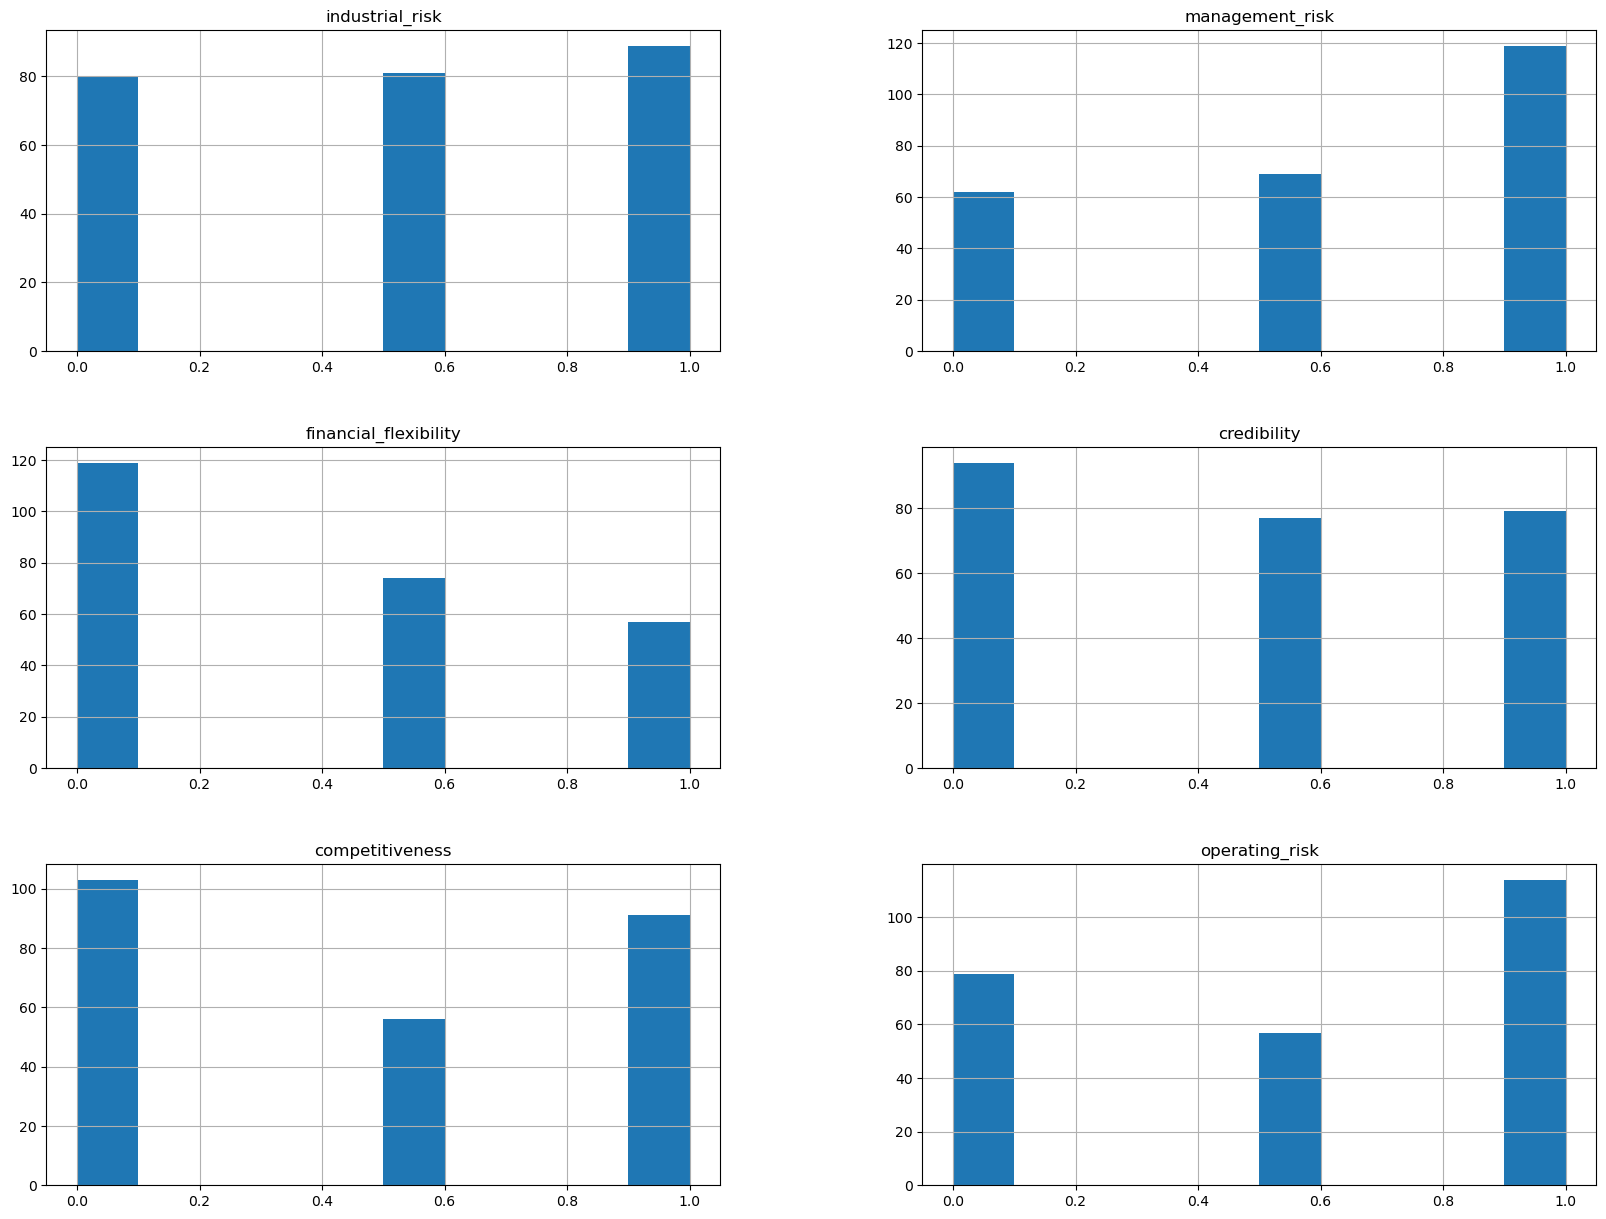

In [138]:
# Histogram
df.hist(bins=10, figsize=(20, 15))
plt.show()

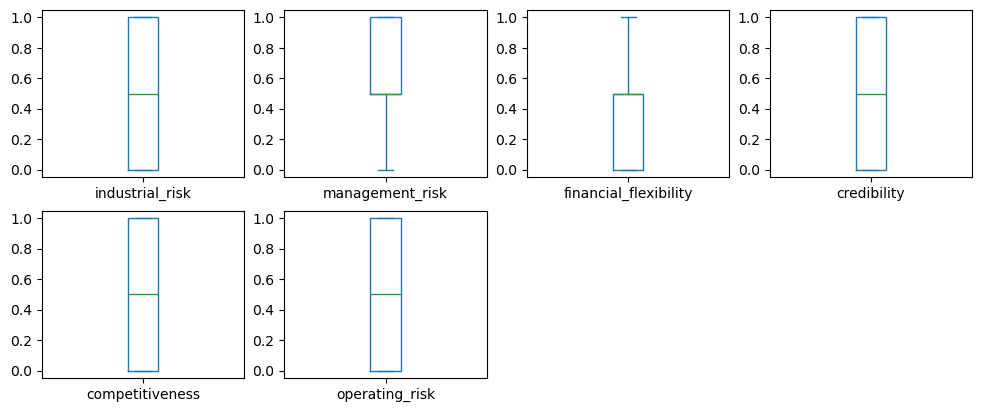

In [139]:
# Boxplot
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()

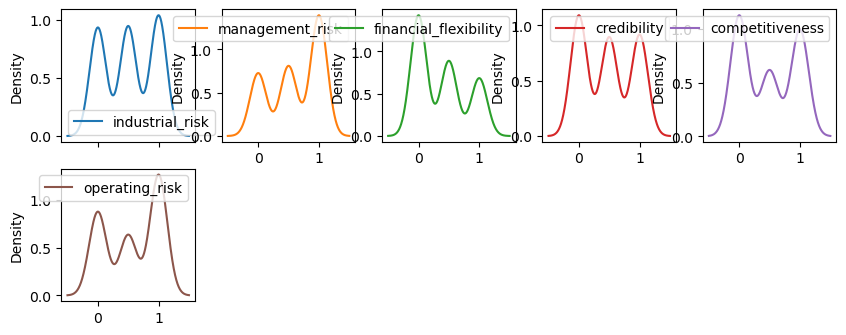

In [140]:
# Density Plot
df.plot(kind='density', subplots=True, layout=(5,5), figsize=(10,10))
plt.show()

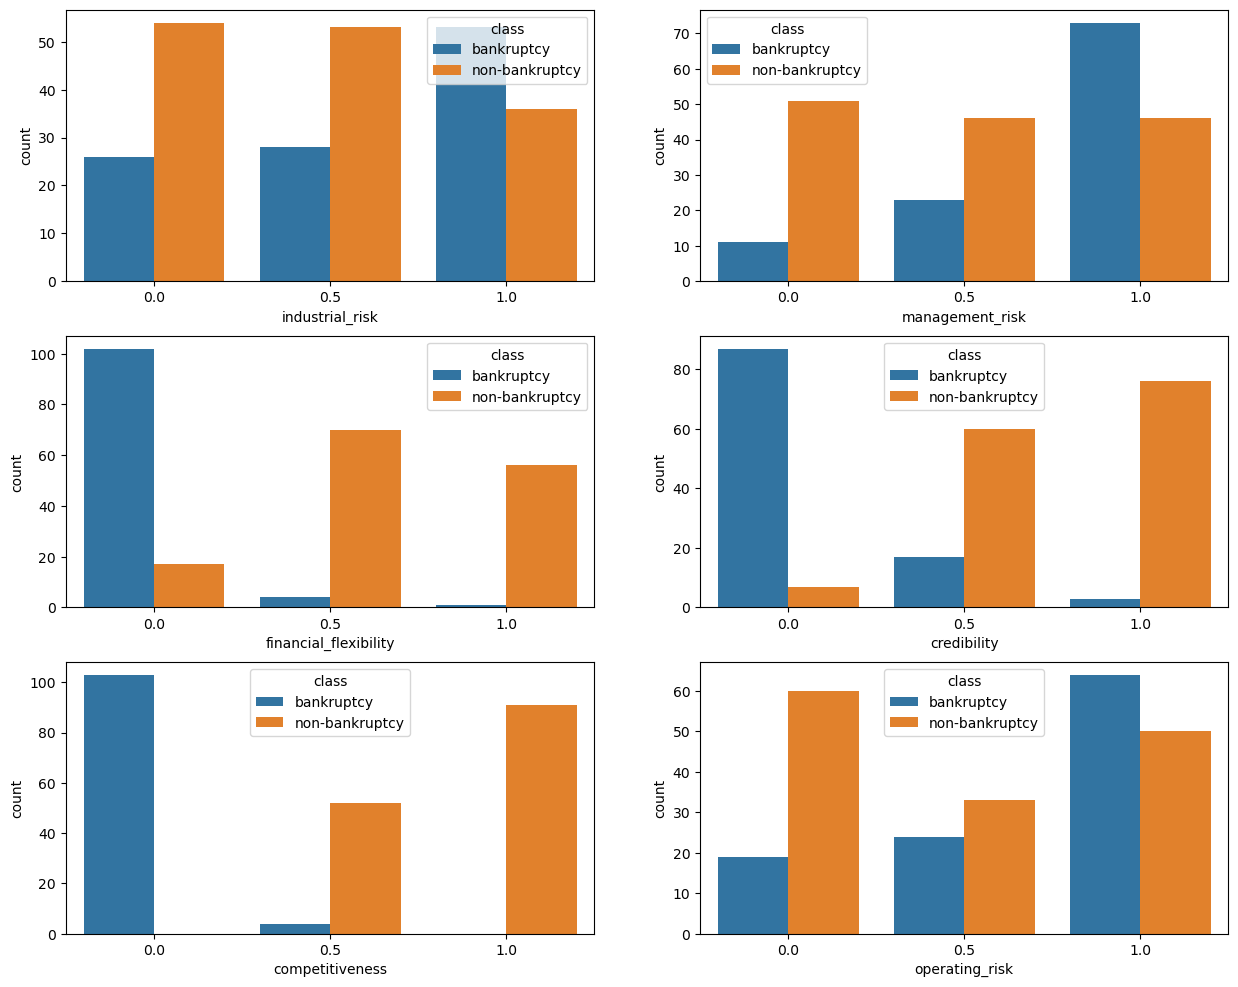

In [141]:
plt.figure(figsize=(15, 12))
for i, predictor in enumerate(df.drop(columns = ['class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=predictor, hue='class')

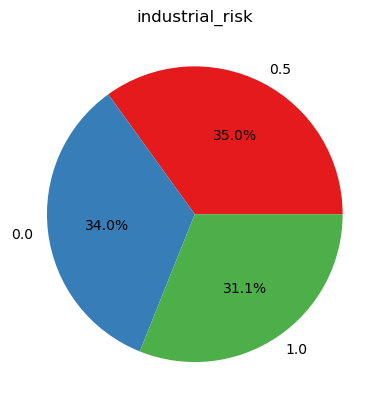

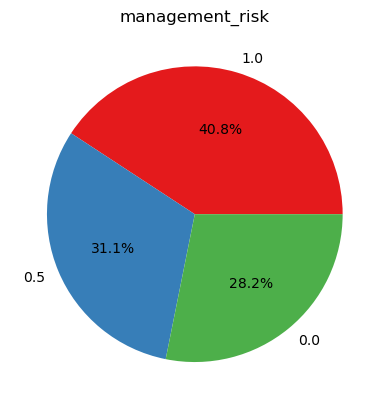

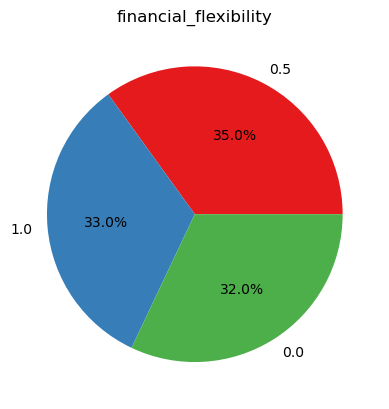

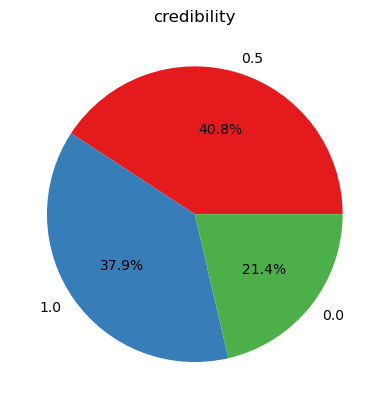

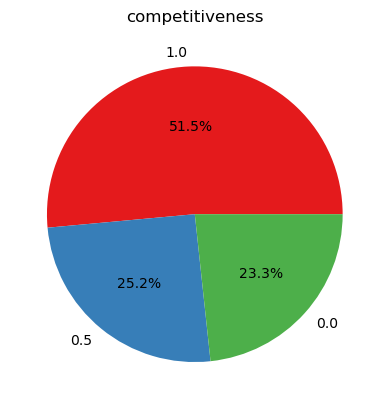

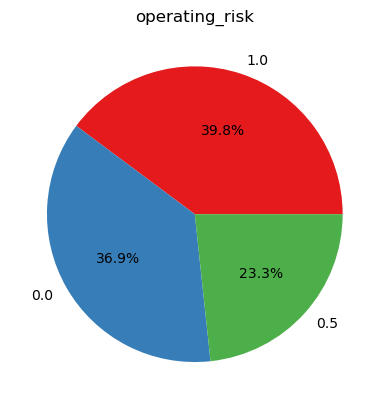

In [142]:
# Pie chart 
for column in columns:
    sns.set_palette("Set1")
    data[column].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()
    

### Bi-Varient Analysis

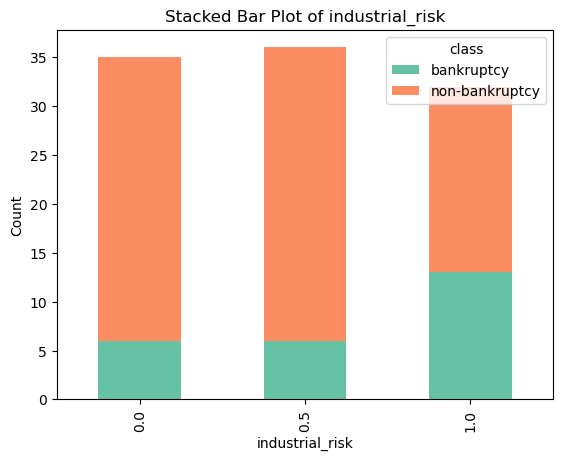

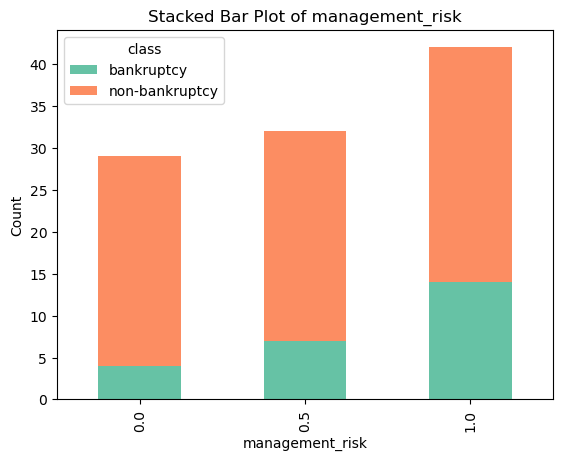

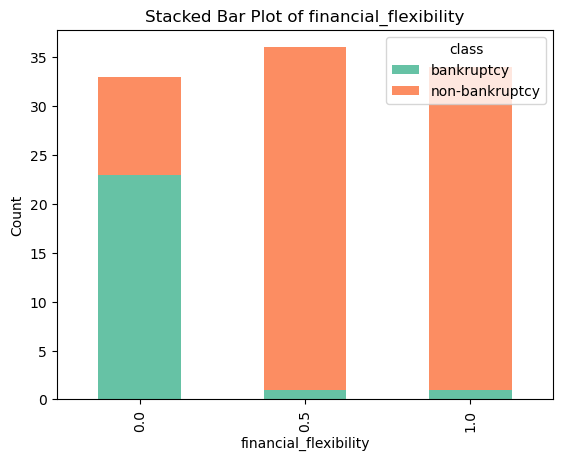

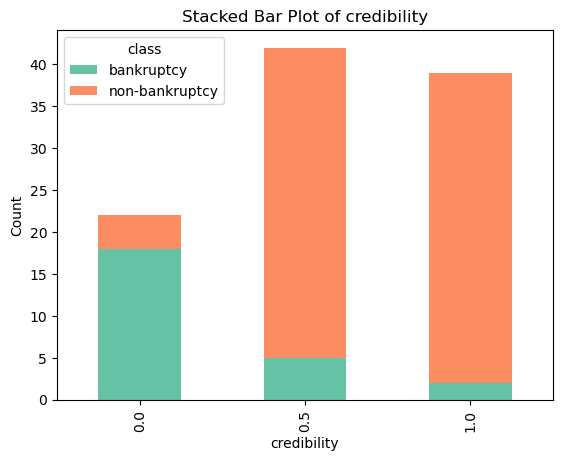

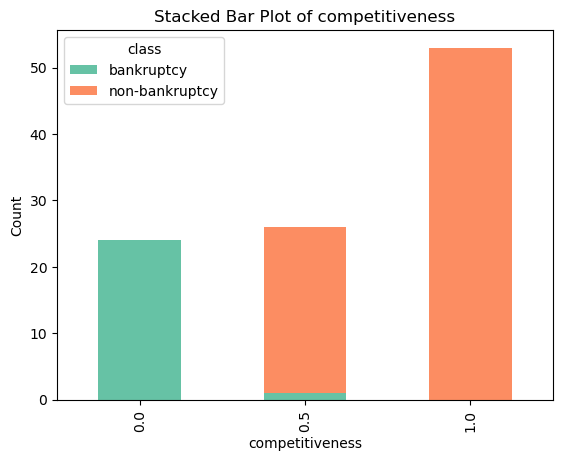

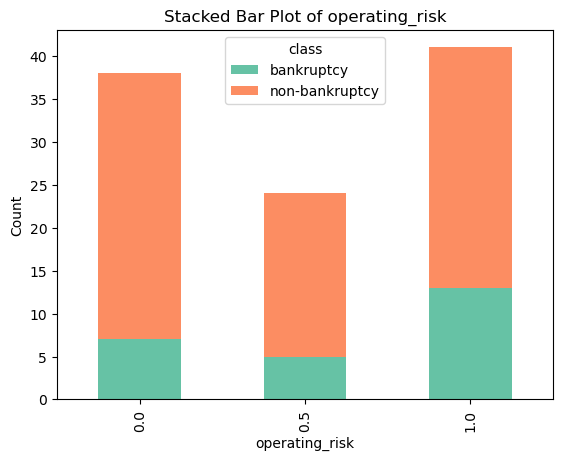

In [143]:

for column in columns:
    sns.set_palette("Set2")
    cross_tab = pd.crosstab(data[column], data['class'])  # Adjust as needed
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


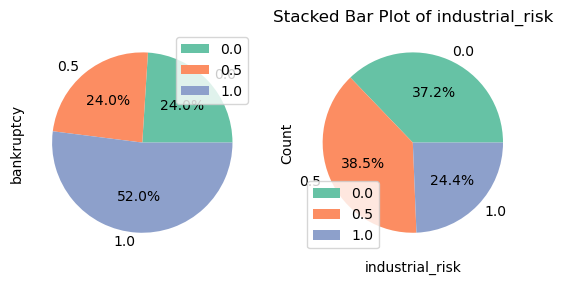

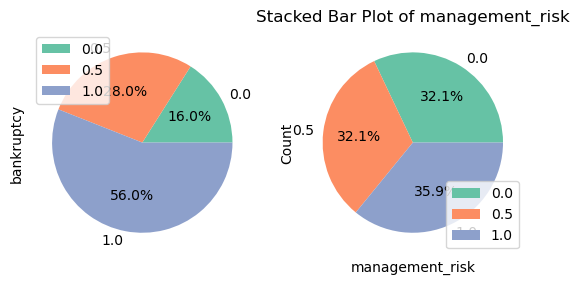

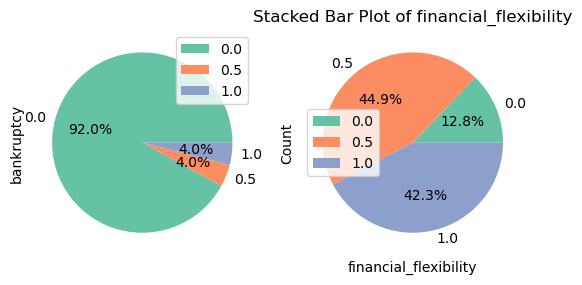

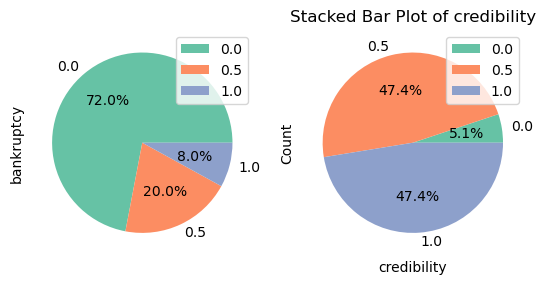

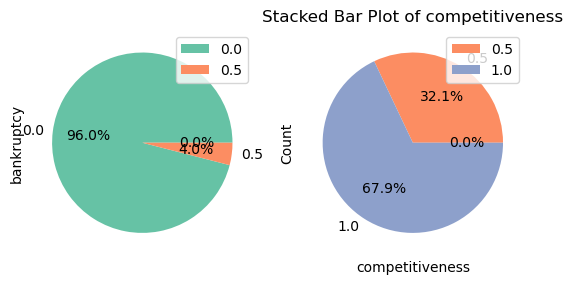

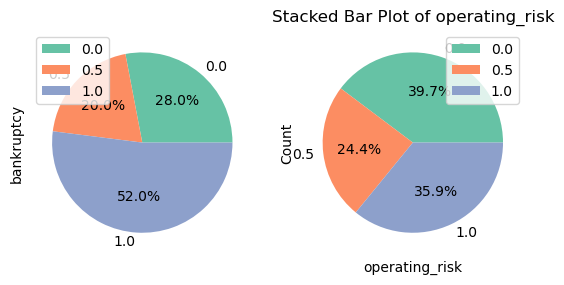

In [144]:
for column in columns:
    if column=="Target_Class":
        continue
    sns.set_palette("Set2")
    cross_tab = pd.crosstab(data[column], data['class'])  # Adjust as needed
    cross_tab.plot(kind='pie',autopct="%1.1f%%", subplots=True)
    plt.title(f'Stacked Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Feature Engineering

### Using PPS Method

In [145]:
y= pps.matrix(data.drop("class",axis=1))

In [146]:
y  =y[["x","y","ppscore"]]

In [147]:
y = y[y["y"]=="Target_Class"]

In [148]:
y.sort_values(by="ppscore",ascending=False)

,x,y,ppscore
48,Target_Class,Target_Class,1.000000
34,competitiveness,Target_Class,0.918726
20,financial_flexibility,Target_Class,0.267600
27,credibility,Target_Class,0.196532
6,industrial_risk,Target_Class,0.000000
13,management_risk,Target_Class,0.000000
41,operating_risk,Target_Class,0.000000


In [149]:
x = data.copy()

In [150]:
for column in columns:
    x[column] = x[column].astype("category")

In [151]:
correlation=pps.matrix(x)

In [152]:
correlation = correlation[["x","y","ppscore"]]
correlation.drop(6,inplace=True)

In [153]:
correlation.reset_index(inplace=True)

In [154]:
correlation=correlation[correlation["y"]=="Target_Class"]

In [155]:
correlation.drop("index",axis=1,inplace=True)

In [156]:
correlation.drop(6,inplace=True)

In [157]:
sorted = correlation.sort_values(by="ppscore",ascending=False).reset_index().drop("index", axis=1)

In [158]:
sorted

,x,y,ppscore
0,class,Target_Class,1.000000
1,Target_Class,Target_Class,1.000000
2,competitiveness,Target_Class,0.918726
3,financial_flexibility,Target_Class,0.267600
4,credibility,Target_Class,0.196532
5,management_risk,Target_Class,0.000000
6,operating_risk,Target_Class,0.000000


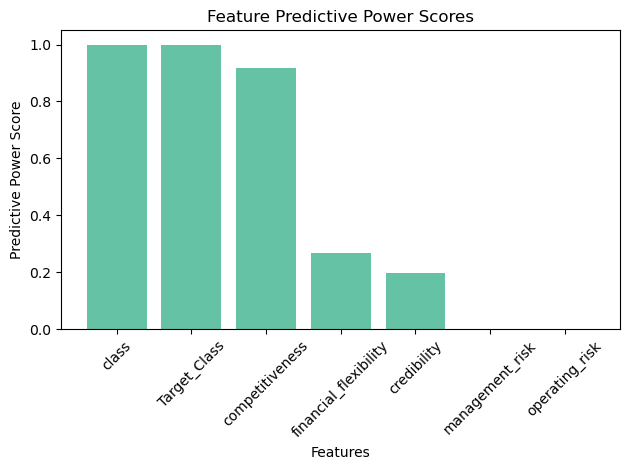

In [159]:
plt.bar(sorted['x'], sorted['ppscore'])
plt.xlabel('Features')
plt.ylabel('Predictive Power Score')
plt.title('Feature Predictive Power Scores')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Features Selection From PPS method

Two pps matrics are formed one is without changing the features data types to categorical and another one after changing the data types to categorical.

Hence the features are categorical so categorical pps metric is considered:

The Target Feature is Highly Dependent on following Three Features:

1. Competitiveness
2. financial flexibility
3. credibility

### Feature Selection Using SelectKBest Method

In [160]:
X = data.drop(["class","Target_Class"],axis=1)
Y = data.Target_Class

In [161]:
test = SelectKBest(score_func=chi2,k=3)
fit=test.fit(X,Y)

In [162]:
scores = fit.scores_

In [163]:
dict={
    "features":X.columns,
    "scores":scores
}

In [164]:
feature_scores = pd.DataFrame(dict)

In [165]:
sorted = feature_scores.sort_values(by="scores",ascending=False).reset_index().drop("index",axis=1)

In [166]:
sorted

,features,scores
0,competitiveness,19.853941
1,financial_flexibility,12.940535
2,credibility,9.182327
3,industrial_risk,1.624656
4,management_risk,1.098641
5,operating_risk,0.713229


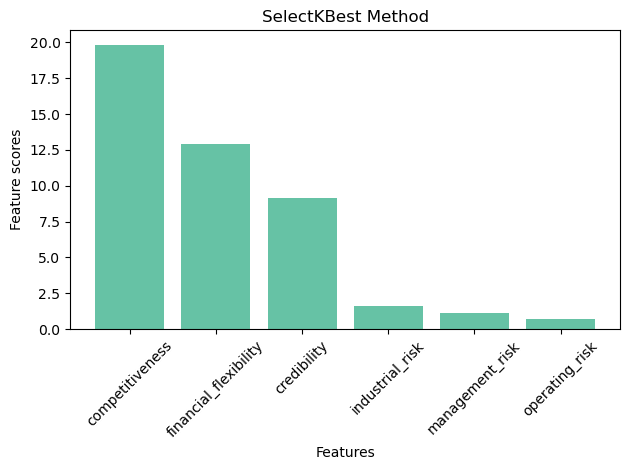

In [167]:
plt.bar(sorted['features'], sorted['scores'])
plt.xlabel('Features')
plt.ylabel('Feature scores')
plt.title('SelectKBest Method')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Feature Selection Using RFE (Recurssive Feature Elimination)

In [168]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit  = rfe.fit(X,Y)

In [169]:
fit.n_features_

3

In [170]:
fit.support_

array([False, False,  True,  True,  True, False])

In [171]:
fit.ranking_

array([2, 3, 1, 1, 1, 4])

In [172]:
dict = {
    "features":X.columns,
    "Support":fit.support_
}

In [173]:
rfe_feature_selection  = pd.DataFrame(dict)


In [174]:
rfe_feature_selection["selection"] = rfe_feature_selection["Support"].apply(lambda x : 1 if x==True else 0)

In [175]:
sorted = rfe_feature_selection.sort_values(by="selection",ascending=False).reset_index().drop("index",axis=1)

In [176]:
sorted

,features,Support,selection
0,financial_flexibility,True,1
1,credibility,True,1
2,competitiveness,True,1
3,industrial_risk,False,0
4,management_risk,False,0
5,operating_risk,False,0


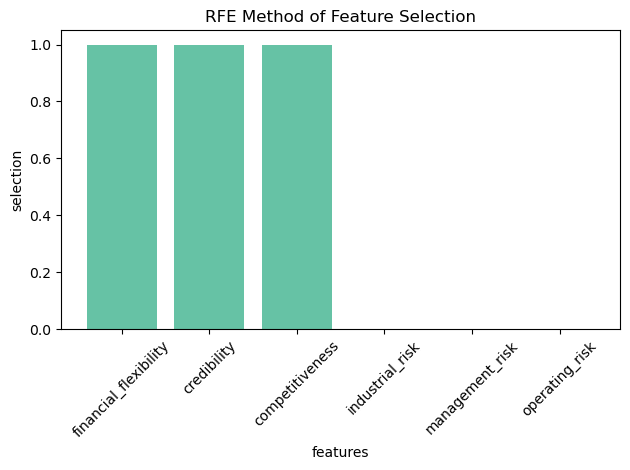

In [177]:
plt.bar(sorted["features"],sorted["selection"])
plt.title("RFE Method of Feature Selection")
plt.xlabel("features")
plt.ylabel("selection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The Features Support Based on the RFE Method of feature selection

### Tree Based Feature Selection

In [178]:
model = DecisionTreeClassifier()
model.fit(X,Y)


DecisionTreeClassifier()

In [179]:
print(model.feature_importances_)

[0.02641026 0.         0.01584615 0.00989549 0.9478481  0.        ]


In [180]:
dict = {
    "features":X.columns,
    "importance":model.feature_importances_
}

In [181]:
feature_importance =pd.DataFrame(dict)
sorted = feature_importance.sort_values(by="importance",ascending=False).reset_index().drop("index",axis=1)

In [182]:
sorted

,features,importance
0,competitiveness,0.947848
1,industrial_risk,0.026410
2,financial_flexibility,0.015846
3,credibility,0.009895
4,management_risk,0.000000
5,operating_risk,0.000000


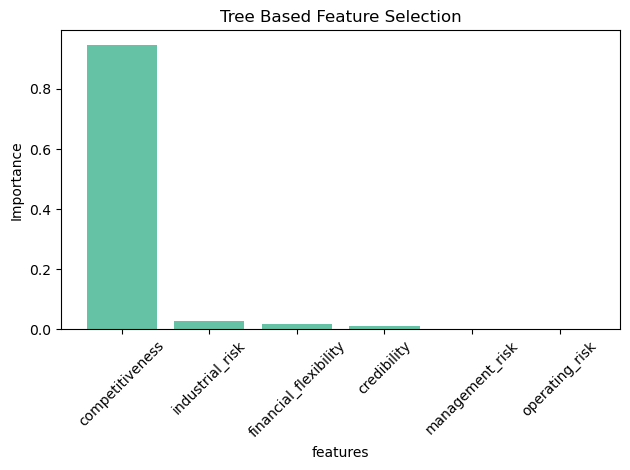

In [183]:
plt.bar(sorted["features"], sorted["importance"])
plt.title("Tree Based Feature Selection")
plt.xlabel("features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Handling Imbalance Data

In [184]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,Target_Class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


In [185]:
data["class"].value_counts()

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

Hence data is imbalce so we have to make it into a balanced dataset.

Down Sampling: 

  Hence the data points are very less so avoid downsampling.

Up Sampling: 

 Using SMOTE method to generate the synthetic data to make it balanced data.

### SMOTE Method of Up Sampling

In [186]:
from imblearn.over_sampling import SMOTE

In [187]:
smote = SMOTE(random_state = 7)
x_smote ,y_smote = smote.fit_resample(X,Y)

In [188]:
balanced_data = pd.concat([x_smote,y_smote],axis=1)

In [189]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        156 non-null    float64
 1   management_risk        156 non-null    float64
 2   financial_flexibility  156 non-null    float64
 3   credibility            156 non-null    float64
 4   competitiveness        156 non-null    float64
 5   operating_risk         156 non-null    float64
 6   Target_Class           156 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 8.1 KB


In [190]:
balanced_data.Target_Class.value_counts()

Target_Class
0    78
1    78
Name: count, dtype: int64

In [191]:
balanced_data.duplicated().sum()

0

# PP Score (Predective Power Score)

In [192]:
import ppscore as ps

In [193]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\bankruptcy_prevention.csv", index_col=0)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [194]:
ps.score(df, x='industrial_risk',y = 'class')

{'x': 'industrial_risk',
 'y': 'class',
 'ppscore': 0.32406595969158425,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.456,
 'model_score': 0.6322918820722219,
 'model': DecisionTreeClassifier()}

In [195]:
feature_sel = ps.matrix(df)

In [196]:
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
1,industrial_risk,management_risk,0.108761,regression,True,mean absolute error,0.362,0.322629,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.352,0.352440,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346,0.361087,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.015113,regression,True,mean absolute error,0.388,0.382136,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000000,regression,True,mean absolute error,0.386,0.387298,DecisionTreeRegressor()
6,industrial_risk,class,0.324066,classification,True,weighted F1,0.456,0.632292,DecisionTreeClassifier()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338,0.348953,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
9,management_risk,financial_flexibility,0.042517,regression,True,mean absolute error,0.352,0.337034,DecisionTreeRegressor()


In [197]:
feature_sel[feature_sel['y'] == 'class']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
6,industrial_risk,class,0.324066,classification,True,weighted F1,0.456,0.632292,DecisionTreeClassifier()
13,management_risk,class,0.412729,classification,True,weighted F1,0.456,0.680525,DecisionTreeClassifier()
20,financial_flexibility,class,0.838948,classification,True,weighted F1,0.456,0.912388,DecisionTreeClassifier()
27,credibility,class,0.798959,classification,True,weighted F1,0.456,0.890634,DecisionTreeClassifier()
34,competitiveness,class,0.970176,classification,True,weighted F1,0.456,0.983776,DecisionTreeClassifier()
41,operating_risk,class,0.314588,classification,True,weighted F1,0.456,0.627136,DecisionTreeClassifier()
48,class,class,1.000000,predict_itself,True,None,0.000,1.000000,None


# Test and Train

In [198]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut,cross_val_score
from sklearn.metrics import classification_report

In [199]:
x = df.iloc[:,:-1]
y = df['class']

In [200]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=100)

In [201]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy

In [202]:
print(classification_report(ytest,ypred))

                precision    recall  f1-score   support

    bankruptcy       0.91      1.00      0.96        32
non-bankruptcy       1.00      0.93      0.96        43

      accuracy                           0.96        75
     macro avg       0.96      0.97      0.96        75
  weighted avg       0.96      0.96      0.96        75



# Model Validation

# K-fold Cross Validation

In [203]:
kf = KFold(n_splits=5)

scores = cross_val_score(DecisionTreeClassifier(),x,y, cv = kf)

In [204]:
scores

array([1.  , 1.  , 1.  , 0.96, 1.  ])

In [205]:
scores.mean

<function ndarray.mean>

In [206]:
from sklearn.linear_model import LogisticRegression

lg_scores = cross_val_score(LogisticRegression(),x,y,cv = kf)

print(lg_scores)
lg_scores.mean()

[1.   0.98 1.   0.98 1.  ]


0.992

In [207]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = cross_val_score(KNeighborsClassifier(), x,y,cv=kf)
print(knn_scores)
knn_scores.mean()

[1.   0.98 1.   0.98 1.  ]


0.992

# Leave one out CV

In [208]:
# Read the dataset
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\bankruptcy_prevention.csv", index_col=0)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [209]:
x = df.iloc[:,:-1]
y = df['class']

In [210]:
lv_cv = LeaveOneOut()

lv_score = cross_val_score(DecisionTreeClassifier(random_state=10),x,y, cv = lv_cv)

In [211]:
lv_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [212]:
len(lv_score)

250

In [213]:
lv_score.mean()

0.992

# Model Building

In [14]:
final_data=pd.read_csv(r"C:\Users\Lenovo\Downloads\final_data.csv")
final_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Target_Class,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,0,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,0,bankruptcy
...,...,...,...,...,...,...,...,...
135,1.0,1.0,0.0,1.0,0.0,0.5,0,bankruptcy
136,1.0,1.0,0.5,0.5,0.0,1.0,0,bankruptcy
137,1.0,0.5,0.0,0.5,0.0,0.5,0,bankruptcy
138,0.5,0.0,0.0,0.0,0.0,0.5,0,bankruptcy


In [15]:
final_data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Target_Class
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.475000,0.585714,0.396429,0.514286,0.492857,0.510714,0.557143
std,0.399302,0.402076,0.404544,0.379051,0.440674,0.434434,0.498508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        140 non-null    float64
 1   management_risk        140 non-null    float64
 2   financial_flexibility  140 non-null    float64
 3   credibility            140 non-null    float64
 4   competitiveness        140 non-null    float64
 5   operating_risk         140 non-null    float64
 6   Target_Class           140 non-null    int64  
 7   Class                  140 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [17]:
final_data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
Target_Class             0
Class                    0
dtype: int64

In [18]:
final_data.duplicated().sum() 

0

In [19]:
#Test and Train dataset
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

In [20]:
x = final_data.iloc[:,:-1]
y = final_data['Target_Class']

In [21]:
xtrain,xtest,ytrain,ytest =  train_test_split(x,y,test_size=0.3, random_state=100)

In [22]:
xtrain

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Target_Class
78,0.5,0.5,0.0,1.0,1.0,0.5,1
76,0.5,1.0,0.5,0.5,1.0,1.0,1
22,1.0,1.0,0.0,1.0,0.0,0.0,0
127,0.0,0.5,0.0,0.5,0.0,1.0,0
102,0.0,1.0,0.5,0.0,0.5,0.0,1
...,...,...,...,...,...,...,...
87,0.0,1.0,0.0,1.0,1.0,0.5,1
103,0.5,0.0,0.5,0.0,0.0,1.0,0
67,0.5,0.0,1.0,0.5,1.0,1.0,1
24,1.0,0.5,1.0,0.5,0.0,0.0,0


In [23]:
xtest

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Target_Class
139,0.0,0.5,0.0,0.5,0.0,0.0,0
97,0.5,0.0,0.5,1.0,0.5,0.0,1
134,1.0,0.5,0.0,1.0,0.0,0.0,0
110,0.0,1.0,0.0,0.5,0.0,0.5,0
81,0.5,0.0,0.5,0.5,0.5,0.0,1
26,1.0,1.0,0.5,0.5,0.5,1.0,1
35,0.0,0.0,1.0,1.0,0.5,0.0,1
32,0.0,0.0,1.0,0.5,0.5,0.0,1
84,0.5,0.5,0.5,1.0,1.0,0.0,1
95,0.0,0.0,0.5,1.0,1.0,1.0,1


In [24]:
ytrain

78     1
76     1
22     0
127    0
102    1
      ..
87     1
103    0
67     1
24     0
8      0
Name: Target_Class, Length: 98, dtype: int64

In [18]:
ytest

139    0
97     1
134    0
110    0
81     1
26     1
35     1
32     1
84     1
95     1
25     1
69     1
40     1
28     1
125    0
133    0
99     1
117    0
11     0
46     1
51     1
101    1
136    0
121    0
37     1
21     0
89     1
119    0
118    0
29     1
96     1
52     1
45     1
106    0
92     1
62     1
130    0
82     1
33     1
105    0
111    0
120    0
Name: Target_Class, dtype: int64

# 1. Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
lg = LogisticRegression() #Object/ Variable
lg.fit(xtrain,ytrain) #Training / Calculation

LogisticRegression()

In [21]:
xtest.shape

(42, 7)

In [22]:
ypred = lg.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [23]:
len(ypred)

42

In [24]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1]
[0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1]


In [25]:
# Classification Report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [127]:
from sklearn.metrics import confusion_matrix

In [132]:
ypred_binary = (ypred >= 0.5).astype(int)

In [133]:
# Confusion Matrix
cm = confusion_matrix(ytest, ypred_binary)
print(cm)

[[17  0]
 [ 0 25]]


In [27]:
# Accuracy Matrix
print(accuracy_score(ytest,ypred))

1.0


<Axes: >

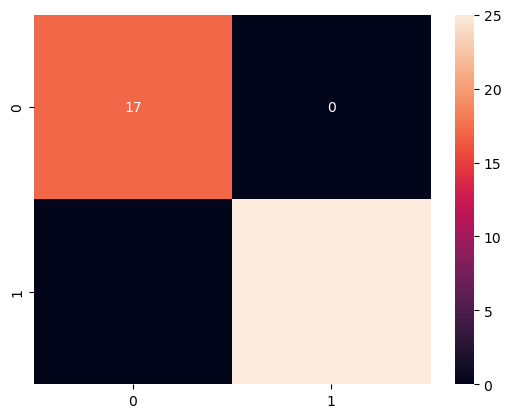

In [138]:
sns.heatmap(confusion_matrix(ytest,ypred_binary), annot=True, fmt = 'g')

In [ ]:
# The logistic regression classifier gives the 1.0(100%) accuracy score.

# 2.SVM Algorithm

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [29]:
# Initialize the SVM classifier
svm = SVC(kernel='linear')

In [30]:
# Train the SVM model
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

In [31]:
# Make predictions on the testing data
ypred_svm = svm.predict(xtest)

In [139]:
# classification report
print(classification_report(ytest,ypred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [140]:
# Confusion Matrix
print(confusion_matrix(ytest,ypred_svm))

[[17  0]
 [ 0 25]]


<Axes: >

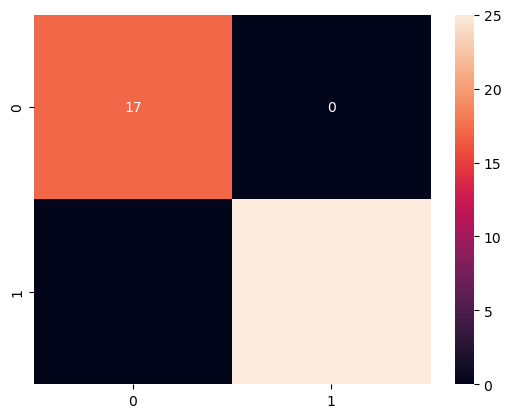

In [142]:
sns.heatmap(confusion_matrix(ytest,ypred_svm), annot=True, fmt = 'g')

In [41]:
# Accuracy Score
print(accuracy_score(ytest,ypred))

1.0


In [ ]:
# Support vector machine algorithm given the 100% accuracy on the dataset.

# 3.KKN Algorithm

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean')

In [44]:
train_acc =[]
test_acc =[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [45]:
train_acc =[]

In [46]:
test_acc =[]

In [47]:
# Make predictions
ypred = knn.predict(xtest)

In [48]:
# classification Report
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [146]:
# Accuracy Score
print( accuracy_score(ytest,ypred_binary))

1.0


In [145]:
#confusion matrix
cm=confusion_matrix(ytest,ypred_binary)
cm

array([[17,  0],
       [ 0, 25]], dtype=int64)

<Axes: >

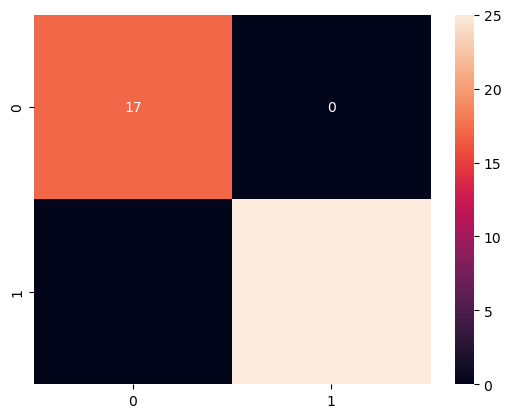

In [148]:
sns.heatmap(confusion_matrix(ytest,ypred_binary), annot=True, fmt = 'g')

In [ ]:
# KNN Algorithm gives the 100% accuracy score on testing data.

# 4.Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
decisiontree_cross_val_score =cross_val_score(estimator,x,y)

In [55]:
print(decisiontree_cross_val_score)

[1. 1. 1. 1. 1.]


In [56]:
parameters={
    "criterion":["gini","entropy"],
    "min_samples_split":[2,3,4,5,6,7],
    "max_depth":[2,3,4,5,6]
                 }
grid_search = GridSearchCV(estimator=estimator,param_grid = parameters)

In [57]:
grid_search.fit(xtest,ytest)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [58]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [59]:
DecisionTree_model = DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_split=2)

In [60]:
DecisionTree_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [61]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [62]:
ypred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [63]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [150]:
print(confusion_matrix(ytest,ypred_binary))

[[17  0]
 [ 0 25]]


In [66]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

1.0

In [67]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [68]:
x.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'Target_Class'],
      dtype='object')

In [69]:
from sklearn import tree 
import matplotlib.pyplot as plt

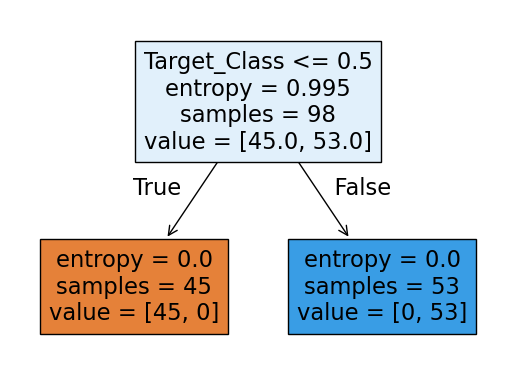

In [70]:
tree.plot_tree(dt,feature_names=x.columns,filled=True)
plt.show()

# 5.Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [69]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ypred

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0.])

In [73]:
r2_score(ytest,ypred)

0.9998814117647059

In [74]:
print('R2 value :', r2_score(ytest, ypred))

R2 value : 0.9998814117647059


In [75]:
mean_squared_error(ytest,ypred)

2.8571428571428574e-05

In [76]:
print('R2 value :', r2_score(ytest, ypred))

R2 value : 0.9998814117647059


In [77]:
mean_squared_error(ytest,ypred)

2.8571428571428574e-05

In [78]:
np.sqrt(mean_squared_error(ytest, ypred))

0.005345224838248488

In [79]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.9998814117647059
MSE: 2.8571428571428574e-05
RMSE: 0.005345224838248488


In [ ]:
#Visualize the random forest

In [80]:
len(rf.estimators_)

100

In [81]:
rf.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=908274072)

In [82]:
x.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'Target_Class'],
      dtype='object')

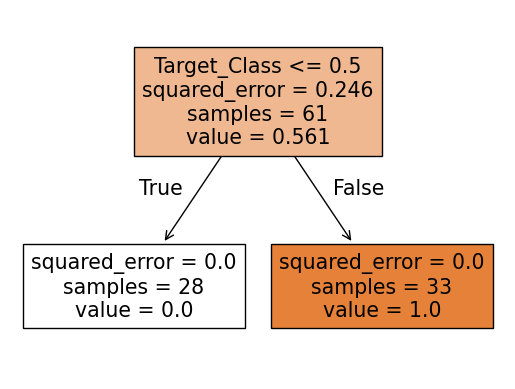

In [83]:
tree.plot_tree(rf.estimators_[5], feature_names=x.columns,
              filled=True)
plt.show()

In [84]:
final_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Target_Class,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,0,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,0,bankruptcy
...,...,...,...,...,...,...,...,...
135,1.0,1.0,0.0,1.0,0.0,0.5,0,bankruptcy
136,1.0,1.0,0.5,0.5,0.0,1.0,0,bankruptcy
137,1.0,0.5,0.0,0.5,0.0,0.5,0,bankruptcy
138,0.5,0.0,0.0,0.0,0.0,0.5,0,bankruptcy


<Axes: xlabel='Target_Class', ylabel='count'>

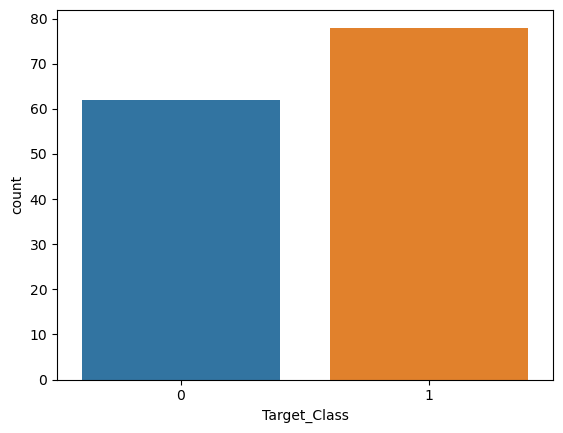

In [85]:
sns.countplot(x = final_data['Target_Class'])

In [86]:
final_data['Target_Class'].replace([0,1],['low','high'], inplace=True)

In [87]:
final_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,Target_Class,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,low,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,low,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,low,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,low,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,low,bankruptcy
...,...,...,...,...,...,...,...,...
135,1.0,1.0,0.0,1.0,0.0,0.5,low,bankruptcy
136,1.0,1.0,0.5,0.5,0.0,1.0,low,bankruptcy
137,1.0,0.5,0.0,0.5,0.0,0.5,low,bankruptcy
138,0.5,0.0,0.0,0.0,0.0,0.5,low,bankruptcy


In [88]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [89]:
yp

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [90]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [ ]:
#Try to visualize first 5 decision trees.

In [91]:
len(rfc.estimators_)

100

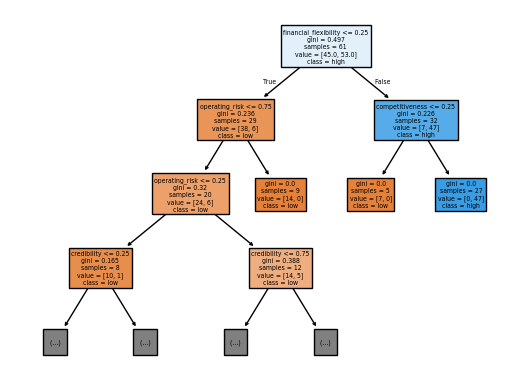

In [93]:
tree.plot_tree(rfc.estimators_[75], feature_names=x.columns,
               class_names=final_data['Target_Class'].unique(),
               filled=True , max_depth=3)
plt.show()

In [ ]:
# Random Forest gives the 100% accuracy score on data.

# 6.Naive Bayes Classifier 

In [9]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Building the model GaussianNB

In [30]:
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1], dtype=int64)

In [31]:
# Evalute model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0]
 [ 0 13]]


In [32]:
# Accuracy score
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

1.0

In [ ]:
# Building the model with MultinomailNB

In [33]:
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1], dtype=int64)

In [ ]:
# Evalute model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [34]:
# Accuracy of MNB
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

1.0

# 7.XGBOOST and Lightgbm

In [ ]:
# LIghtGbM Model

In [72]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [73]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier()

In [38]:
# Train the model
lgb_model.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 65, number of negative: 47
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.580357 -> initscore=0.324240
[LightGBM] [Info] Start training from score 0.324240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


LGBMClassifier()

In [40]:
# Make predictions
lgb_pred = lgb_model.predict(x_test)

In [41]:
# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

In [42]:
print(f"LightGBM Model Performance:\nAccuracy: {lgb_accuracy:.2f}\nPrecision: {lgb_precision:.2f}\nRecall: {lgb_recall:.2f}\nF1 Score: {lgb_f1:.2f}")


LightGBM Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [74]:
# XGboost Model
import xgboost as xgb

In [75]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [46]:
# Train the model
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [48]:
# Make predictions
xgb_pred = xgb_model.predict(x_test)


In [49]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

In [50]:
#print the final result
print(f"XGBoost Model Performance:\nAccuracy: {xgb_accuracy:.2f}\nPrecision: {xgb_precision:.2f}\nRecall: {xgb_recall:.2f}\nF1 Score: {xgb_f1:.2f}")

XGBoost Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
# Evaluate the tuned model
best_lgb_accuracy = accuracy_score(y_test, xgb_pred)
best_lgb_precision = precision_score(y_test, xgb_pred)
best_lgb_recall = recall_score(y_test, xgb_pred)
best_lgb_f1 = f1_score(y_test, xgb_pred)

In [56]:
print(f"Tuned LightGBM Model Performance:\nAccuracy: {best_lgb_accuracy:.2f}\nPrecision: {best_lgb_precision:.2f}\nRecall: {best_lgb_recall:.2f}\nF1 Score: {best_lgb_f1:.2f}")


Tuned LightGBM Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [57]:
# Print comparison of models
print(f"Comparison of Model Performance:")
print(f"LightGBM Accuracy: {lgb_accuracy:.2f}, Precision: {lgb_precision:.2f}, Recall: {lgb_recall:.2f}, F1 Score: {lgb_f1:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, F1 Score: {xgb_f1:.2f}")
print(f"Tuned LightGBM Accuracy: {best_lgb_accuracy:.2f}, Precision: {best_lgb_precision:.2f}, Recall: {best_lgb_recall:.2f}, F1 Score: {best_lgb_f1:.2f}")


Comparison of Model Performance:
LightGBM Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
XGBoost Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Tuned LightGBM Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00


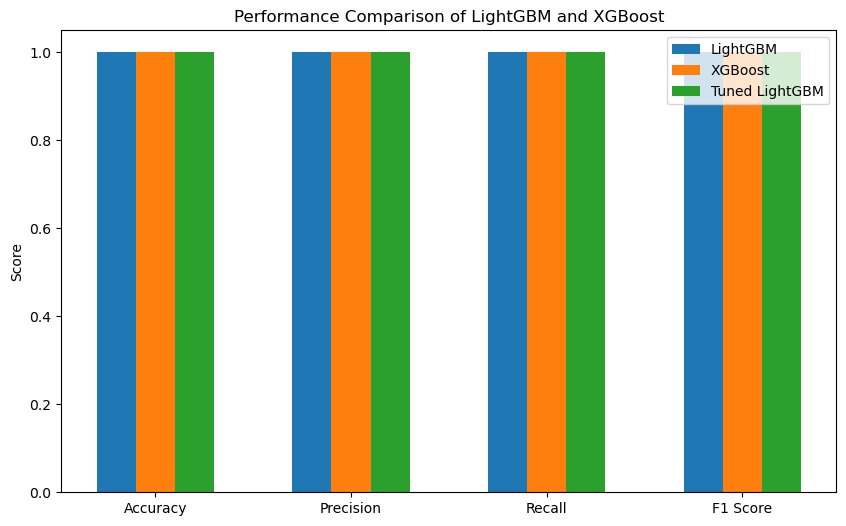

In [58]:
# Visualize comparison using bar plots
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_metrics = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_metrics = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
best_lgb_metrics = [best_lgb_accuracy, best_lgb_precision, best_lgb_recall, best_lgb_f1]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, lgb_metrics, width=0.2, label='LightGBM', align='center')
plt.bar([p + 0.2 for p in x], xgb_metrics, width=0.2, label='XGBoost', align='center')
plt.bar([p + 0.4 for p in x], best_lgb_metrics, width=0.2, label='Tuned LightGBM', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()


In [61]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\bankruptcy_prevention.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
X = array[:,0:6]
Y = array[:,6]


In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv(r"C:\Users\Lenovo\Downloads\bankruptcy_prevention.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
x=data.iloc[:,0:6]
y=data.iloc[:,6]

In [84]:
names = ["Logistic Regression", "SVM", "Decision Tree","KNN",
          "Random Forest","Naive Bayes Classifier","XGboost and Lightgbm"]

In [85]:
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    ]

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
                                                    random_state=1)

In [87]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(x_train,y_train)
    df.loc[index,'Test Accuracy'] = clf.score(x_test,y_test)
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(x_test))
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(x_test))
    df.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(x_test))
    index+=1

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [83]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Train Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparision')
plt.show()

ValueError: Could not interpret input 'Classifiers'

In [ ]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Test Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()

In [ ]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Precision', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparision')
plt.show()

In [ ]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Recall', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparision')
plt.show()


In [ ]:
# import seaborn as sns
sns.barplot(x='Classifiers',y='F1 Score', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model F1 Score Comparision')
plt.show()